Mount Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWj5vb5wu9J7rNhIvftfAmBXpyB2eUbuhXFbxZYqDH6XjIgd2dJfNxI
Mounted at /content/drive


Imports

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import sklearn.metrics as metrics
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import joblib
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import model_selection
import keras
from keras.optimizers import *
from keras.models import * 
from keras.layers import *
from keras.regularizers import *
from keras.wrappers.scikit_learn import KerasRegressor


Read Data

In [ ]:
  
def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

def preprocess_data(df):
    idxrs = df[['player_name', 'position', 'GW', 'kickoff_time',  'value',  'total_points']]
    df = df.drop(columns = ['player_name', 'GW', 'kickoff_time', 'season']) # Drop indexing features
    for col in df.columns:
      df[col] = df[col].replace({True:1, False:0})   # Binary encoding
    ohe_cols = []
    for col in df.select_dtypes(include='object').columns:
        ohe_cols.append(col)
    df = pd.get_dummies(df, columns=ohe_cols, prefix=ohe_cols)  # One hot encodings
    df['kickoff_time'] = idxrs['kickoff_time']
    idxrs['total_points']
    return df, idxrs


def get_training_data(GW, scale):
    df = pd.read_csv('C://Users//jd-vz//Desktop//Code//data//')
    min_date = df[(df['GW'] == GW) & (df['season'] == 2020)]['kickoff_time'].min() # The first date of the gameweek
    max_date = df[(df['GW'] == GW) & (df['season'] == 2020)]['kickoff_time'].max() # The last date of the gameweek
    df, idxrs = preprocess_data(df)
    df_scl = df[df['kickoff_time'] <= max_date].copy() # Only includes up to gameweek 
    idxrs = idxrs[idxrs['kickoff_time'] <= max_date] # Only includes gameweek
    std_x, std_y = StandardScaler(), StandardScaler()
    scaled_cols = []
    drop_lst = list(idxrs.columns[idxrs.columns.isin(df_scl.columns)])
    drop_lst.append('total_points')

    if scale == True:
      for col in df.columns.drop(drop_lst): # Drop response and indexing features
        if df[col].nunique() > 2:
          scaled_cols.append(col)
      df_scl[scaled_cols] = std_x.fit_transform(df_scl[scaled_cols])
      df_scl['total_points'] = std_y.fit_transform(df_scl['total_points'].to_numpy().reshape(-1, 1)) # Scale differently
      
    df_train, df_test = df_scl[df_scl['kickoff_time'] < min_date], df_scl[df_scl['kickoff_time'] >= min_date] # Split by date
    X = df_train.drop(drop_lst, axis = 1)
    y = df_train['total_points']
    X_val = df_test.drop(drop_lst, axis = 1)
    y_val = df_test['total_points']
    test_idxrs = idxrs[idxrs['kickoff_time'] >= min_date]
    return X, X_val, y, y_val, test_idxrs, std_y

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))



Save weekly predictions

In [ ]:
def baseline_256(neurons = 256, dropout_rate = 0, activation = 'relu',
                 init_mode = 'he_uniform', optimizer = 'Adam', weight_decay = 1e-3, 
                 hidden_layers = 2):
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode,  kernel_regularizer=l2(weight_decay), activation=activation))
    model.add(Dense(neurons, kernel_initializer=init_mode,  kernel_regularizer=l2(weight_decay), activation=activation))
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model



def get_predictions():
  all_dfs = []
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
  for GW in range(1, 39):
    print(f'Predicting for Gameweek {GW}')
    X_train, X_test, y_train, y_test, idxrs_test, std_y  = get_training_data(GW = GW, scale = True)
    models = []
    models.append(('LR', Pipeline([('LR', LinearRegression())])))
    # models.append(('Net', KerasRegressor(build_fn=baseline_256, epochs=100, 
    #                                                      batch_size=32, verbose=0, validation_split = 0.2)))
    # callbacks = [callback],
    for name, model in models:
      if name == 'Net':
        model.fit(X_train,y_train)
        idxrs_test[name] =  np.round(std_y.inverse_transform(model.predict(X_test)))
      else:
        idxrs_test[name] =  np.round(std_y.inverse_transform(model.fit(X_train,y_train).predict(X_test)))
    all_dfs.append(idxrs_test)
  df_preds = pd.concat(all_dfs).reset_index(drop=True)
  df_preds.loc[df_preds['position'] == 'DMID', 'position'] = 'MID'
  df_preds.loc[df_preds['position'] == 'AMID', 'position'] = 'MID' # Replace 
  df_team = pd.read_csv('/content/drive/MyDrive/Data/collected_us.csv')[['player_name', 'kickoff_time', 'team', 'minutes']]
  df_preds = pd.merge(df_preds, df_team, on = ['player_name', 'kickoff_time'])
  df_preds.to_csv('/content/drive/MyDrive/Predictions/model_predictions.csv', index = False)
  return df_preds



In [ ]:
df = get_predictions()


Predicting for Gameweek 1
Predicting for Gameweek 2
Predicting for Gameweek 3
Predicting for Gameweek 4
Predicting for Gameweek 5
Predicting for Gameweek 6
Predicting for Gameweek 7
Predicting for Gameweek 8
Predicting for Gameweek 9
Predicting for Gameweek 10
Predicting for Gameweek 11
Predicting for Gameweek 12
Predicting for Gameweek 13
Predicting for Gameweek 14
Predicting for Gameweek 15
Predicting for Gameweek 16
Predicting for Gameweek 17
Predicting for Gameweek 18
Predicting for Gameweek 19
Predicting for Gameweek 20
Predicting for Gameweek 21
Predicting for Gameweek 22
Predicting for Gameweek 23
Predicting for Gameweek 24
Predicting for Gameweek 25
Predicting for Gameweek 26
Predicting for Gameweek 27
Predicting for Gameweek 28
Predicting for Gameweek 29
Predicting for Gameweek 30
Predicting for Gameweek 31
Predicting for Gameweek 32
Predicting for Gameweek 33
Predicting for Gameweek 34
Predicting for Gameweek 35
Predicting for Gameweek 36
Predicting for Gameweek 37
Predicting

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Predictions/model_predictions.csv')




df_true = pd.read_csv('./drive/MyDrive/Data/engineered_us.csv')
df_true = df_true[['player_name',  'value', 'team', 'opponent_team',  'kickoff_time', 'total_points']]
df_true = pd.merge(df_true, df_position, on = ['player_name', 'team', 'opponent_team',  'kickoff_time'])
df_final = pd.merge(df_preds, df_true, on = ['player_name', 'team', 'opponent_team',  'kickoff_time'])
regression_results(df_final['total_points'], df_final['Net'])
# df_final.to_csv('/content/drive/MyDrive/Predictions/model_predictions.csv', index = False)

,player_name,kickoff_time,season,GW,team,opponent_team,Net,value,total_points,position
0,Aaron Connolly,2020-09-14,2020,1,Brighton,Chelsea,1.0,55,1,FWD
1,Aaron Cresswell,2020-09-12,2020,1,West Ham,Newcastle,7.0,50,1,DEF
2,Aaron Ramsdale,2020-09-14,2020,1,Sheffield Utd,Wolves,3.0,50,1,GK
3,Abdoulaye Doucouré,2020-09-13,2020,1,Everton,Spurs,1.0,55,3,MID
4,Adam Lallana,2020-09-14,2020,1,Brighton,Chelsea,2.0,65,1,MID
...,...,...,...,...,...,...,...,...,...,...
7447,Willian José Da Silva,2021-05-23,2020,38,Wolves,Man Utd,1.0,68,2,FWD
7448,Willy Boly,2021-05-23,2020,38,Wolves,Man Utd,-0.0,54,0,DEF
7449,Youri Tielemans,2021-05-23,2020,38,Leicester,Spurs,2.0,64,2,MID
7450,Yves Bissouma,2021-05-23,2020,38,Brighton,Arsenal,3.0,44,2,MID


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Predictions/model_predictions.csv')
df = df[df['GW'] == 2]
regression_results(df['total_points'], df['LR'])


FileNotFoundError: ignored

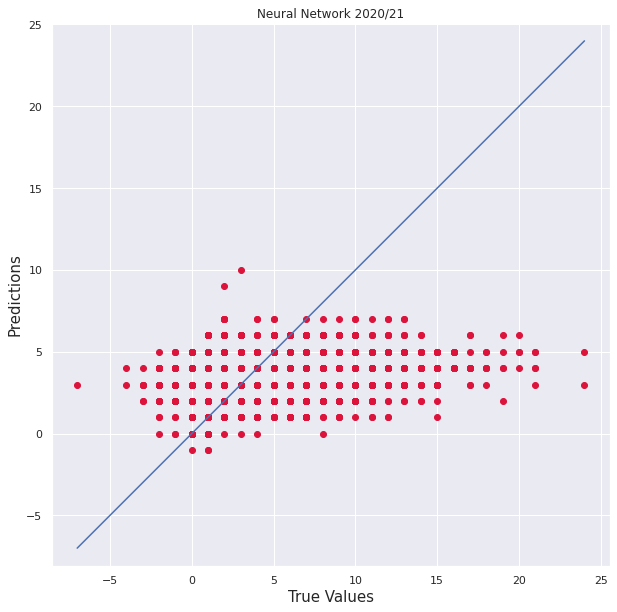

In [ ]:
import seaborn as sns
  
def plot_results(true_value, predicted_value, title):
    sns.set()
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(title)
    plt.axis('equal')
    plt.show()
plot_results(df['total_points'], df['LR'], 'Neural Network 2020/21')

In [ ]:
def create_model():
    activation='relu' 
    dropout_rate=0.0 
    init_mode='uniform'
    weight_constraint=0 
    optimizer='adam' 
    lr = 0.01
    momemntum=0

    model = Sequential()
    model.add(Dense(8, 
                    input_dim=input_dim, kernel_initializer=init_mode, 
                    activation=activation,
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode,  kernel_regularizer=l2(weight_decay), activation=activation))
    model.add(Dense(neurons, kernel_initializer=init_mode,  kernel_regularizer=l2(weight_decay), activation=activation))
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
# create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10) 
activation =  ['relu'] # softmax, softplus, softsign 
momentum = [0.0, 0.2]
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0,  0.2]
weight_constraint=[0]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
epochs = [30, 50]
batch_size = [32, 512] 
param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y) 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(256, 256)],
    'max_iter': [50], # Maximum number of epochs
    'activation': ['relu'], # Activation function for hidden layers
    'solver': ['adam'],
    'alpha': [0], #  L2 regularization coefficient
    'learning_rate': ['adaptive'],
    'batch_size' : [32],
    'early_stopping':[False], # Early Stopping
    'learning_rate_init': [0.001], # Value for learning rate
    'momentum':[0.9], # SGD momentum
    'n_iter_no_change':[10], # Convergence for tolerance
    'nesterovs_momentum':[True], # SGD momentum
    'validation_fraction':[0.2], # Size of validation split
     'beta_1': [0.9], # Adam coeff
      'beta_2': [0.999], # Adam coeff
      # 'dropout': [0], # Dropoout
    'epsilon':[1e-08]
}
X_train, X_test, y_train, y_test, idxrs_test, std_y = get_training_data(GW = 1, scale = True)
grid = GridSearchCV(MLPRegressor(verbose = True), param_grid, n_jobs= 8, cv=4, verbose = 10).fit(X_train, y_train)
print(grid.best_params_) 

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:  1.4min finished


Iteration 1, loss = 0.03246183
Iteration 2, loss = 0.01460330
Iteration 3, loss = 0.00433857
Iteration 4, loss = 0.00353956
Iteration 5, loss = 0.00260819
Iteration 6, loss = 0.00269363
Iteration 7, loss = 0.00263980
Iteration 8, loss = 0.00215318
Iteration 9, loss = 0.00187986
Iteration 10, loss = 0.00177476
Iteration 11, loss = 0.00294179
Iteration 12, loss = 0.00192569
Iteration 13, loss = 0.00164122
Iteration 14, loss = 0.00150732
Iteration 15, loss = 0.00129758
Iteration 16, loss = 0.00186408
Iteration 17, loss = 0.00179047
Iteration 18, loss = 0.00142730
Iteration 19, loss = 0.00102291
Iteration 20, loss = 0.00099840
Iteration 21, loss = 0.00142550
Iteration 22, loss = 0.00125946
Iteration 23, loss = 0.00135634
Iteration 24, loss = 0.00090816
Iteration 25, loss = 0.00165577
Iteration 26, loss = 0.00078185
Iteration 27, loss = 0.00077147
Iteration 28, loss = 0.00081121
Iteration 29, loss = 0.00078396
Iteration 30, loss = 0.00093315
Iteration 31, loss = 0.00094681
Iteration 32, los

In [ ]:
MLPRegressor(activation='relu', alpha=0, batch_size=32, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256, 256), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=50, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.2, verbose=True, warm_start=False)


MLPRegressor(activation='relu', alpha=0, batch_size=32, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256, 256), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=50, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.2, verbose=True, warm_start=False)
